Корреляционные методы отбора признаков

Задание 1. Работа с корреляционной матрицей.
Используйте набор данных "Iris" из sklearn.datasets. Вычислите
корреляционную матрицу числовых признаков. Затем визуализируйте эту
матрицу с помощью heatmap в библиотеке seaborn.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_wine, fetch_california_housing
from sklearn.preprocessing import OrdinalEncoder

In [4]:
# загрузка датасета
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

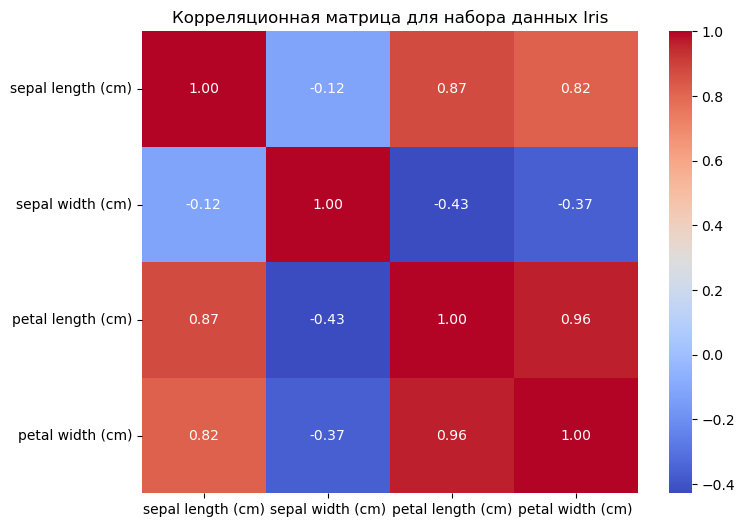

In [5]:
correlation_matrix_iris = iris_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_iris, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Корреляционная матрица для набора данных Iris")
plt.show()

Задание 2: Исключение мультиколлинеарных признаков.
Используйте набор данных "Wine" из sklearn.datasets. Вычислите
корреляционную матрицу, а затем найдите и исключите признаки, у которых
корреляция друг с другом превышает заданный порог.

In [7]:
# загрузка датасета
wine_data = load_wine()
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

In [8]:
wine_corr_matrix = wine_df.corr()

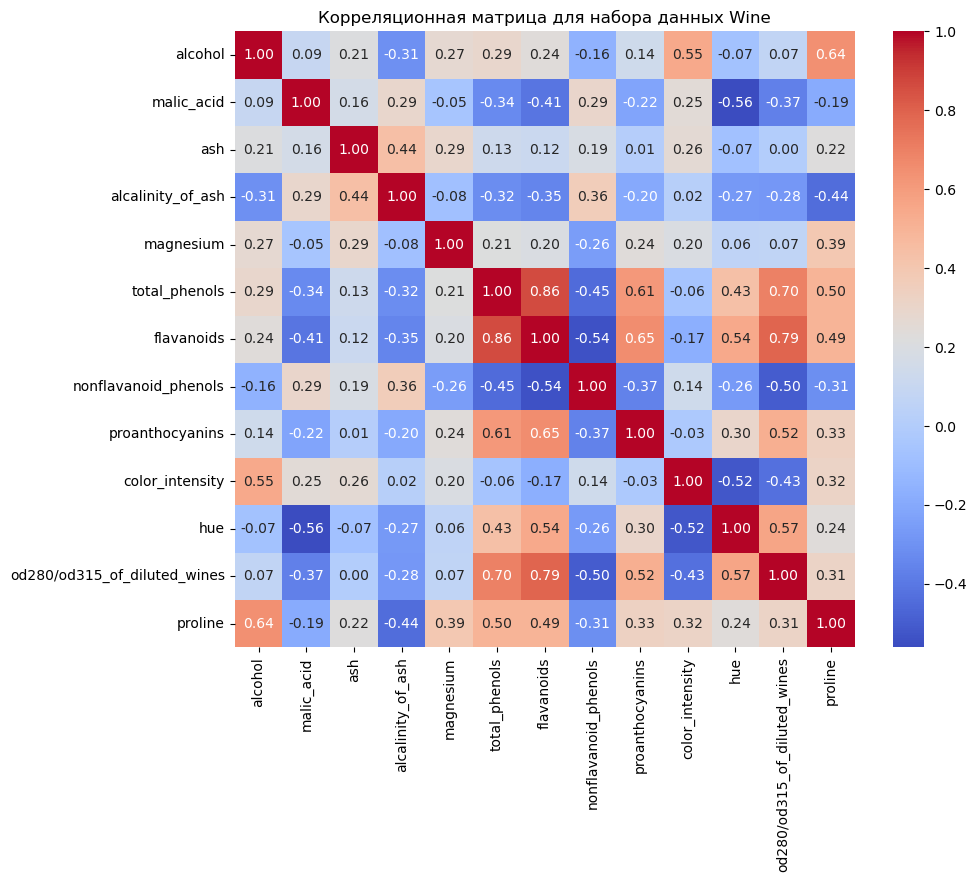

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(wine_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Корреляционная матрица для набора данных Wine")
plt.show()

In [10]:
# определяем порог корреляции
correlation_threshold = 0.7
high_correlation_features = set()

# ищем превышение порога
for i in range(len(wine_corr_matrix.columns)):
    for j in range(i):
        if abs(wine_corr_matrix.iloc[i, j]) > correlation_threshold:
            feature_name = wine_corr_matrix.columns[i]
            high_correlation_features.add(feature_name)

In [11]:
# выкидываем превышающие порог признаки
wine_df_reduced = wine_df.drop(columns=high_correlation_features)

In [12]:
print(f"Исключены: {high_correlation_features}")
print(f"Оставшиеся признаки: {wine_df_reduced.columns.tolist()}")

Исключены: {'flavanoids', 'od280/od315_of_diluted_wines'}
Оставшиеся признаки: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'proline']


Задание 3: Выбор наиболее значимых признаков.
Используйте набор данных "Boston Housing" из sklearn.datasets. Вычислите
коэффициенты корреляции между каждым признаком и целевой переменной,
затем выберите n признаков с наибольшим абсолютным значением
коэффициента.

In [14]:
boston = fetch_california_housing()  # California Housing это аналог boston housing
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

# определяем целевую переменную
boston_df["Target"] = boston.target  # целевая переменная

In [15]:
correlations = boston_df.corr()["Target"].drop("Target")

In [16]:
# определяем количество лучших признаков
n = 5
top_features = correlations.abs().nlargest(n).index.tolist()  

In [17]:
print(f"Топ-{n} признаков с наибольшей корреляцией с целевой переменной:")
print(boston_df[top_features].corrwith(boston_df["Target"]))

Топ-5 признаков с наибольшей корреляцией с целевой переменной:
MedInc       0.688075
AveRooms     0.151948
Latitude    -0.144160
HouseAge     0.105623
AveBedrms   -0.046701
dtype: float64


Задание 4: Применение Ранговой корреляции Спирмена.
Используйте любой набор данных, имеющий порядковые признаки.
Примените корреляцию Спирмена для выбора наиболее значимых признаков.

In [19]:
from sklearn.preprocessing import LabelEncoder

# Загружаем данные 
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
           'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
income_df = pd.read_csv(url, names=columns)
income_df.isnull().sum() # проверка на пропущенные значения

# Преобразуем категориальные признаки в числовые (LabelEncoder)
le = LabelEncoder()

# Применяем к нужным признакам
income_df['education'] = le.fit_transform(income_df['education'])
income_df['marital_status'] = le.fit_transform(income_df['marital_status'])
income_df['occupation'] = le.fit_transform(income_df['occupation'])
income_df['relationship'] = le.fit_transform(income_df['relationship'])
income_df['race'] = le.fit_transform(income_df['race'])
income_df['sex'] = le.fit_transform(income_df['sex'])
income_df['native_country'] = le.fit_transform(income_df['native_country'])
income_df['income'] = income_df['income'].apply(lambda x: 1 if x == '>50K' else 0)  # Преобразуем целевую переменную в бинарный формат

# Выбираем только порядковые признаки и целевую переменную
ordinal_features = ['education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
X = income_df[ordinal_features]
y = income_df['income']

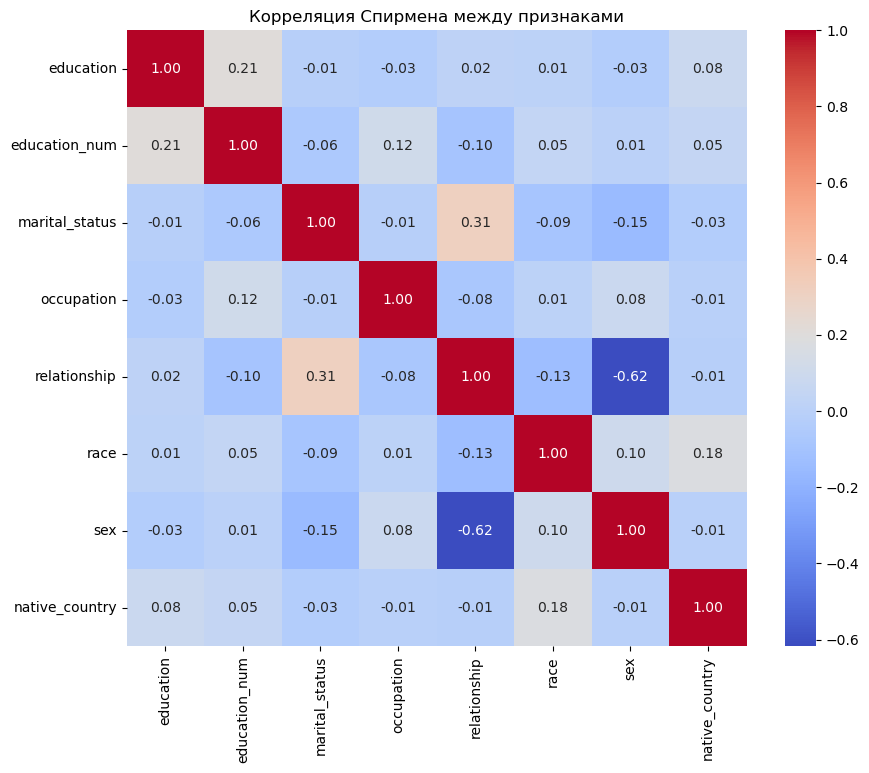

In [20]:
from scipy.stats import spearmanr

# Применяем корреляцию Спирмена
corr, _ = spearmanr(X)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=ordinal_features, yticklabels=ordinal_features)
plt.title('Корреляция Спирмена между признаками')
plt.show()

In [21]:
# Выводим корреляцию каждого признака с целевой переменной
correlations = corr[-1]  # последние значения корреляции в строке соответствуют корреляции с целевой переменной

# Создаем серию с корреляцией признаков и сортируем по значимости (по абсолютной величине)
correlations = pd.Series(correlations, index=ordinal_features)
correlations = correlations.abs().sort_values(ascending=False)

print("Отобранные признаки на основе корреляции Спирмена:", correlations)

Отобранные признаки на основе корреляции Спирмена: native_country    1.000000
race              0.175203
education         0.083620
education_num     0.050102
marital_status    0.031598
relationship      0.013201
occupation        0.007114
sex               0.006870
dtype: float64
